# Import libraries

In [1]:
# Basic
import pandas as pd
import numpy as np
import os
from platform import python_version

# mlflow
import mlflow
from urllib.parse import urlparse
import mlflow.sklearn
import mlflow.xgboost
from random import random, randint
from mlflow import log_metric, log_param, log_artifacts

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mso

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Model selection
from sklearn.model_selection import train_test_split

# Auto ML
#from tpot import TPOTClassifier

# Modeling
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Feature importance (XGBoost)
from xgboost import plot_importance

# Report
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, \
    confusion_matrix, classification_report

# Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.svm import SVC

# Pipeline
from imblearn.pipeline import Pipeline
#preprocessing pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#import warnings
#warnings.filterwarnings("ignore")

# Database

In [2]:
df = pd.read_csv("data/bquxjob_4a55ecd5_184c3af4fbe.csv")
df

,fullVisitorId,bounces,time_on_site,will_buy_on_return_visit,pageviews,medium,channelGrouping,deviceCategory,country,date
0,5777438125314310020,0,12884,0,169.0,organic,Organic Search,desktop,United States,20220919
1,5777438125314310020,0,12884,0,1.0,organic,Organic Search,desktop,United States,20220919
2,5777438125314310020,0,12884,0,8.0,organic,Organic Search,desktop,United States,20220919
3,5777438125314310020,0,12884,1,178.0,organic,Organic Search,desktop,United States,20220919
4,7209403264301039802,0,8793,0,1.0,(none),Direct,desktop,United States,20220928
...,...,...,...,...,...,...,...,...,...,...
48049,4362490200806308515,1,0,0,1.0,(none),Direct,desktop,(not set),20220924
48050,6737381346243471980,1,0,0,1.0,(none),Direct,desktop,(not set),20220924
48051,3763043934585916260,1,0,0,1.0,(none),Direct,desktop,(not set),20220924
48052,1512694728925216829,1,0,0,1.0,(none),Direct,desktop,United States,20220926


# EDA

In [3]:
df = df.set_index('fullVisitorId')
df

,bounces,time_on_site,will_buy_on_return_visit,pageviews,medium,channelGrouping,deviceCategory,country,date
fullVisitorId,,,,,,,,,
5777438125314310020,0,12884,0,169.0,organic,Organic Search,desktop,United States,20220919
5777438125314310020,0,12884,0,1.0,organic,Organic Search,desktop,United States,20220919
5777438125314310020,0,12884,0,8.0,organic,Organic Search,desktop,United States,20220919
5777438125314310020,0,12884,1,178.0,organic,Organic Search,desktop,United States,20220919
7209403264301039802,0,8793,0,1.0,(none),Direct,desktop,United States,20220928
...,...,...,...,...,...,...,...,...,...
4362490200806308515,1,0,0,1.0,(none),Direct,desktop,(not set),20220924
6737381346243471980,1,0,0,1.0,(none),Direct,desktop,(not set),20220924
3763043934585916260,1,0,0,1.0,(none),Direct,desktop,(not set),20220924


## Data Visualisation

In [4]:
df_best_country = df.copy()[df["country"].isin(["United States", "France", 
                                                "India", "China", "Germany",
                                                "Canada"])]
df_best_country['country'].value_counts(ascending=False)

United States    37584
India              233
Canada             137
Germany            111
France              93
China               58
Name: country, dtype: int64

In [5]:
df_best_country = df_best_country.drop(['medium','date'], axis= 1)
df_best_country

,bounces,time_on_site,will_buy_on_return_visit,pageviews,channelGrouping,deviceCategory,country
fullVisitorId,,,,,,,
5777438125314310020,0,12884,0,169.0,Organic Search,desktop,United States
5777438125314310020,0,12884,0,1.0,Organic Search,desktop,United States
5777438125314310020,0,12884,0,8.0,Organic Search,desktop,United States
5777438125314310020,0,12884,1,178.0,Organic Search,desktop,United States
7209403264301039802,0,8793,0,1.0,Direct,desktop,United States
...,...,...,...,...,...,...,...
8602446103979356400,1,0,0,1.0,Direct,desktop,United States
4123541726812043190,1,0,0,1.0,Direct,desktop,United States
7422467211645809532,0,0,0,1.0,Direct,desktop,United States


In [6]:
df_visu = df_best_country.copy()

In [8]:
#change categorial columns
categorial = df_visu[['channelGrouping','deviceCategory', 'country']]

for i in categorial.columns:
    df_visu[i]= LabelEncoder().fit_transform(df_visu[i])
    df_visu[i].unique()
    
categorial

,channelGrouping,deviceCategory,country
fullVisitorId,,,
5777438125314310020,4,0,5
5777438125314310020,4,0,5
5777438125314310020,4,0,5
5777438125314310020,4,0,5
7209403264301039802,1,0,5
...,...,...,...
8602446103979356400,1,0,5
4123541726812043190,1,0,5
7422467211645809532,1,0,5


In [9]:
df_visu["target"]= df_visu['will_buy_on_return_visit']
df_visu = df_visu.drop("will_buy_on_return_visit",axis=1)

# Preprocessing

In [10]:
df_visu = df_visu.dropna(axis=0)

In [11]:
df_model = df_visu.copy()

In [12]:
X = df_model.drop('target', axis=1)
y = df_model['target']

In [13]:
X

,bounces,time_on_site,pageviews,channelGrouping,deviceCategory,country
fullVisitorId,,,,,,
5777438125314310020,0,12884,169.0,4,0,5
5777438125314310020,0,12884,1.0,4,0,5
5777438125314310020,0,12884,8.0,4,0,5
5777438125314310020,0,12884,178.0,4,0,5
7209403264301039802,0,8793,1.0,1,0,5
...,...,...,...,...,...,...
8602446103979356400,1,0,1.0,1,0,5
4123541726812043190,1,0,1.0,1,0,5
7422467211645809532,0,0,1.0,1,0,5


In [14]:
y

fullVisitorId
5777438125314310020    0
5777438125314310020    0
5777438125314310020    0
5777438125314310020    1
7209403264301039802    0
                      ..
8602446103979356400    0
4123541726812043190    0
7422467211645809532    0
9073331298813470434    0
1512694728925216829    0
Name: target, Length: 38012, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Resample Data (rééquilibre)

In [16]:
over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.75)
steps = [('over', over), ('under', under)]
pipeline_smote = Pipeline(steps=steps)

In [17]:
df_resample_X , df_resample_y = pipeline_smote.fit_resample(X_train, y_train)

In [18]:
df_resample_X

,bounces,time_on_site,pageviews,channelGrouping,deviceCategory,country
0,1,0,1.000000,1,0,5
1,0,1234,3.000000,4,1,5
2,0,99,3.000000,1,0,5
3,0,190,11.000000,4,0,5
4,0,69,7.000000,4,0,5
...,...,...,...,...,...,...
11050,0,1512,9.000000,1,0,5
11051,0,541,4.259035,4,0,5
11052,1,0,7.000000,4,0,5
11053,0,2653,9.381774,1,0,5


In [19]:
df_resample_y.value_counts()

0    6317
1    4738
Name: target, dtype: int64

## Dictionnaire des modèles

In [20]:
#Preparation des évaluations avec une fonction

def print_binary_evaluation(y_true, y_pred):
    results_dict = {'accuracy': accuracy_score(y_true, y_pred),
                    'recall': recall_score(y_true, y_pred),
                    'precision': precision_score(y_true, y_pred),
                    'f1_score': f1_score(y_true, y_pred)}
    return results_dict

In [21]:
model_dico = {"RandomForestClassifier": RandomForestClassifier(random_state=42),
              "AdaBoostClassifier" : AdaBoostClassifier(random_state=42),
              "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    
             'RandomForestClassifierTPOT': RandomForestClassifier(criterion='entropy', 
                                                  max_features=0.05,
                                                  min_samples_leaf=4,
                                                  min_samples_split=19,
                                                  random_state=42),
              
              'XGBoostClassifier' : XGBClassifier(random_state=42),
              
              'LogisticRegression': LogisticRegression(random_state=42),
              
             }

In [22]:
model_dico

{'RandomForestClassifier': RandomForestClassifier(random_state=42),
 'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
 'RandomForestClassifierTPOT': RandomForestClassifier(criterion='entropy', max_features=0.05,
                        min_samples_leaf=4, min_samples_split=19,
                        random_state=42),
 'XGBoostClassifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_ch

In [23]:
normalisation = {'std_scaler' : StandardScaler(),
                 'minmax_scaler' : MinMaxScaler()
                }

In [24]:
normalisation

{'std_scaler': StandardScaler(), 'minmax_scaler': MinMaxScaler()}

In [25]:
results = {}
metrics_df = pd.DataFrame()
acc_lst = []
recall_lst = []
precision_lst = []
f1_score_lst = []
roc_auc_score_lst = []
model_lst = []
scaler_type = []
balancing = []

for i in model_dico.keys():
    tmp_model = model_dico[i]
    for n in normalisation.keys():        
        tmp_model.fit(normalisation[n].fit_transform(df_resample_X), df_resample_y)
        test_mod_name = f"{i}_with_{n}"
        results[test_mod_name] = X_test.copy()
        results[test_mod_name]['predict'] = tmp_model.predict(normalisation[n].fit_transform(X_test))
        results[test_mod_name]['Actual'] = y_test
        results[test_mod_name]['proba_0'] = tmp_model.predict_proba(normalisation[n].fit_transform(X_test))[:,0]
        results[test_mod_name]['proba_1'] = tmp_model.predict_proba(normalisation[n].fit_transform(X_test))[:,1]
        model_lst.append(i)
        scaler_type.append(n)
        acc_tmp = accuracy_score(results[test_mod_name]['Actual'],results[test_mod_name]['predict'])
        recall_tmp = recall_score(results[test_mod_name]['Actual'],results[test_mod_name]['predict'])
        precision_tmp = precision_score(results[test_mod_name]['Actual'],results[test_mod_name]['predict'])
        f1_tmp = f1_score(results[test_mod_name]['Actual'],results[test_mod_name]['predict'])
        roc_auc_score_tmp = roc_auc_score(results[test_mod_name]['Actual'],results[test_mod_name]['predict'])
        acc_lst.append(acc_tmp)
        recall_lst.append(recall_tmp)
        precision_lst.append(precision_tmp)
        f1_score_lst.append(f1_tmp)
        roc_auc_score_lst.append(roc_auc_score_tmp)
        balancing.append("Smote+Under")
        
for i in model_dico.keys():
    tmp_model = model_dico[i]
    for n in normalisation.keys():        
        tmp_model.fit(normalisation[n].fit_transform(X_train), y_train)
        test_mod_name = f"{i}_with_{n}"
        results[test_mod_name] = X_test.copy()
        results[test_mod_name]['predict'] = tmp_model.predict(normalisation[n].fit_transform(X_test))
        results[test_mod_name]['Actual'] = y_test
        results[test_mod_name]['proba_0'] = tmp_model.predict_proba(normalisation[n].fit_transform(X_test))[:,0]
        results[test_mod_name]['proba_1'] = tmp_model.predict_proba(normalisation[n].fit_transform(X_test))[:,1]
        model_lst.append(i)
        scaler_type.append(n)
        acc_tmp = accuracy_score(results[test_mod_name]['Actual'],results[test_mod_name]['predict'])
        recall_tmp = recall_score(results[test_mod_name]['Actual'],results[test_mod_name]['predict'])
        precision_tmp = precision_score(results[test_mod_name]['Actual'],results[test_mod_name]['predict'])
        f1_tmp = f1_score(results[test_mod_name]['Actual'],results[test_mod_name]['predict'])
        roc_auc_score_tmp = roc_auc_score(results[test_mod_name]['Actual'],results[test_mod_name]['predict'])
        acc_lst.append(acc_tmp)
        recall_lst.append(recall_tmp)
        precision_lst.append(precision_tmp)
        f1_score_lst.append(f1_tmp)
        roc_auc_score_lst.append(roc_auc_score_tmp)
        balancing.append("Raw")

C:\Users\Simplon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
results['XGBoostClassifier_with_minmax_scaler'][(results['XGBoostClassifier_with_minmax_scaler']['proba_1']> 0.45) & (results['XGBoostClassifier_with_minmax_scaler']['proba_1'] < 0.7)]

,bounces,time_on_site,pageviews,channelGrouping,deviceCategory,country,predict,Actual,proba_0,proba_1
fullVisitorId,,,,,,,,,,
4500095704518255716,0,4364,21.0,1,0,5,1,1,0.330899,0.669101
4941155851879273368,0,125,16.0,1,0,5,1,1,0.462426,0.537574
2418703176480266655,1,0,13.0,1,0,5,0,1,0.549797,0.450203
2129879987465460805,0,139,13.0,1,0,5,0,0,0.539984,0.460016
6185434648025201797,0,286,19.0,1,0,5,0,1,0.541461,0.458539
...,...,...,...,...,...,...,...,...,...,...
3597995316426802538,0,97,21.0,4,0,5,1,0,0.347852,0.652148
4500095704518255716,0,4364,20.0,1,0,5,1,0,0.330899,0.669101
2500705818830727814,0,29,10.0,1,0,5,1,1,0.379321,0.620679


In [27]:
metrics_df["model"]= model_lst
metrics_df["scaler type using"] = scaler_type
metrics_df['balancing_process']=balancing
metrics_df["accuracy score"] = acc_lst
metrics_df["recall score"] = recall_lst
metrics_df["precision score"] = precision_lst
metrics_df["f1 score"] = f1_score_lst
metrics_df["roc_auc_score"] = roc_auc_score_lst


In [28]:
metrics_df.sort_values("f1 score",ascending=False).style.background_gradient(cmap = "YlGn")

,model,scaler type using,balancing_process,accuracy score,recall score,precision score,f1 score,roc_auc_score
7,RandomForestClassifierTPOT,minmax_scaler,Smote+Under,0.734128,0.821699,0.257308,0.391897,0.772817
3,AdaBoostClassifier,minmax_scaler,Smote+Under,0.683444,0.894870,0.233898,0.370861,0.776852
1,RandomForestClassifier,minmax_scaler,Smote+Under,0.721677,0.756939,0.237781,0.361882,0.737255
9,XGBoostClassifier,minmax_scaler,Smote+Under,0.662136,0.901598,0.222962,0.357512,0.767931
10,LogisticRegression,std_scaler,Smote+Under,0.680288,0.835997,0.223622,0.352858,0.749080
5,DecisionTreeClassifier,minmax_scaler,Smote+Under,0.685549,0.769554,0.216466,0.337888,0.722663
11,LogisticRegression,minmax_scaler,Smote+Under,0.811119,0.438183,0.259591,0.326033,0.646356
2,AdaBoostClassifier,std_scaler,Smote+Under,0.499211,0.946173,0.166125,0.282628,0.696679
6,RandomForestClassifierTPOT,std_scaler,Smote+Under,0.509120,0.915896,0.165326,0.280093,0.688834
12,RandomForestClassifier,std_scaler,Raw,0.857769,0.257359,0.292823,0.273948,0.592507


In [29]:
y_true_actu = results["RandomForestClassifier_with_minmax_scaler"]['Actual']

In [30]:
y_probability = results["RandomForestClassifier_with_minmax_scaler"]['proba_1']

# Model Tuning (RandomForest)

In [149]:
# RandomForestClassifier 's parameters

estimator_param = RandomForestClassifier(random_state=42)

param_grid = { 
    'classifier__n_estimators': [50,100,150,200],
    'classifier__criterion':['gini', 'entropy'],
    'classifier__min_samples_split': [19],
    'classifier__min_samples_leaf':[4],
    'classifier__max_features' : [0.05,0.10,0.15],
    "classifier__random_state" : [42]
}

In [150]:
rnd_search = GridSearchCV(estimator= estimator_param, param_grid= param_grid, scoring='f1', cv=5, verbose=1,
                          return_train_score=True,
                          refit=True)

In [151]:
for param in rnd_search.get_params().keys():
    print(param)

cv
error_score
estimator__bootstrap
estimator__ccp_alpha
estimator__class_weight
estimator__criterion
estimator__max_depth
estimator__max_features
estimator__max_leaf_nodes
estimator__max_samples
estimator__min_impurity_decrease
estimator__min_samples_leaf
estimator__min_samples_split
estimator__min_weight_fraction_leaf
estimator__n_estimators
estimator__n_jobs
estimator__oob_score
estimator__random_state
estimator__verbose
estimator__warm_start
estimator
n_jobs
param_grid
pre_dispatch
refit
return_train_score
scoring
verbose


In [152]:
#create pipeline

pipe_classifier = Pipeline([
    ("minmax_scaler", MinMaxScaler()),
    ("classifier", RandomForestClassifier(random_state=42))
])

In [153]:
clf = GridSearchCV(estimator= pipe_classifier,
             param_grid= param_grid,
             scoring='f1',
             cv=5,
             verbose=3,
             return_train_score=True,
             refit=True)

In [154]:
pipe_classifier.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'minmax_scaler', 'classifier', 'minmax_scaler__clip', 'minmax_scaler__copy', 'minmax_scaler__feature_range', 'classifier__bootstrap', 'classifier__ccp_alpha', 'classifier__class_weight', 'classifier__criterion', 'classifier__max_depth', 'classifier__max_features', 'classifier__max_leaf_nodes', 'classifier__max_samples', 'classifier__min_impurity_decrease', 'classifier__min_samples_leaf', 'classifier__min_samples_split', 'classifier__min_weight_fraction_leaf', 'classifier__n_estimators', 'classifier__n_jobs', 'classifier__oob_score', 'classifier__random_state', 'classifier__verbose', 'classifier__warm_start'])

In [155]:
print(pipe_classifier)

Pipeline(steps=[('minmax_scaler', MinMaxScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])


In [156]:
#search best param for model

clf.fit(df_resample_X, df_resample_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END classifier__criterion=gini, classifier__max_features=0.05, classifier__min_samples_leaf=4, classifier__min_samples_split=19, classifier__n_estimators=50, classifier__random_state=42;, score=(train=0.870, test=0.772) total time=   0.4s
[CV 2/5] END classifier__criterion=gini, classifier__max_features=0.05, classifier__min_samples_leaf=4, classifier__min_samples_split=19, classifier__n_estimators=50, classifier__random_state=42;, score=(train=0.872, test=0.752) total time=   0.3s
[CV 3/5] END classifier__criterion=gini, classifier__max_features=0.05, classifier__min_samples_leaf=4, classifier__min_samples_split=19, classifier__n_estimators=50, classifier__random_state=42;, score=(train=0.849, test=0.831) total time=   0.3s
[CV 4/5] END classifier__criterion=gini, classifier__max_features=0.05, classifier__min_samples_leaf=4, classifier__min_samples_split=19, classifier__n_estimators=50, classifier__random_state=42

KeyboardInterrupt: 

In [ ]:
best_estim= clf.best_estimator_
print(best_estim)

## second test GridSearchCV RandomForest

In [31]:
pipe_classifier_second = Pipeline([
    ("minmax_scaler", MinMaxScaler()),
    ("classifier", RandomForestClassifier())
])

In [32]:
param_grid_second = { 
    'classifier__n_estimators': [200,300,500],
    'classifier__criterion':['gini', 'entropy'],
    'classifier__min_samples_split': [19],
    'classifier__min_samples_leaf':[4],
    'classifier__max_features' : [0.05],
    "classifier__random_state" : [42]
}

In [33]:
second_clf = GridSearchCV(estimator= pipe_classifier_second,
             param_grid= param_grid_second,
             scoring='f1',
             cv=5,
             verbose=3,
             return_train_score=True,
             refit=True)

In [34]:
print(pipe_classifier_second)

Pipeline(steps=[('minmax_scaler', MinMaxScaler()),
                ('classifier', RandomForestClassifier())])


In [35]:
#search best param for model

second_clf.fit(df_resample_X, df_resample_y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END classifier__criterion=gini, classifier__max_features=0.05, classifier__min_samples_leaf=4, classifier__min_samples_split=19, classifier__n_estimators=200, classifier__random_state=42;, score=(train=0.838, test=0.745) total time=   1.9s
[CV 2/5] END classifier__criterion=gini, classifier__max_features=0.05, classifier__min_samples_leaf=4, classifier__min_samples_split=19, classifier__n_estimators=200, classifier__random_state=42;, score=(train=0.841, test=0.716) total time=   2.1s
[CV 3/5] END classifier__criterion=gini, classifier__max_features=0.05, classifier__min_samples_leaf=4, classifier__min_samples_split=19, classifier__n_estimators=200, classifier__random_state=42;, score=(train=0.841, test=0.709) total time=   1.9s
[CV 4/5] END classifier__criterion=gini, classifier__max_features=0.05, classifier__min_samples_leaf=4, classifier__min_samples_split=19, classifier__n_estimators=200, classifier__random_state=

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmax_scaler', MinMaxScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_features': [0.05],
                         'classifier__min_samples_leaf': [4],
                         'classifier__min_samples_split': [19],
                         'classifier__n_estimators': [200, 300, 500],
                         'classifier__random_state': [42]},
             return_train_score=True, scoring='f1', verbose=3)

In [36]:
second_clf.best_estimator_

Pipeline(steps=[('minmax_scaler', MinMaxScaler()),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_features=0.05,
                                        min_samples_leaf=4,
                                        min_samples_split=19, n_estimators=200,
                                        random_state=42))])

In [37]:
second_clf.best_score_

0.768629796823156

In [38]:
second_clf.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_features': 0.05,
 'classifier__min_samples_leaf': 4,
 'classifier__min_samples_split': 19,
 'classifier__n_estimators': 200,
 'classifier__random_state': 42}

## GridSearchCV for XGBoost Classifier

In [ ]:
estimator_param_boost = XGBClassifier(random_state=42)

In [ ]:
# define param for XGBoostClassifier

param_grid_boost = { "classifier__n_estimators": [1000, 1500, 2000, 2500, 3000],
                    "classifier__learning_rate": [0.05, 0.01, 0.5, 0.1]
                   }

In [ ]:
rnd_search_boost = GridSearchCV(estimator= estimator_param_boost, 
                                param_grid= param_grid_boost, 
                                scoring='f1', 
                                cv=5, 
                                verbose=3,
                                return_train_score=True,
                                refit=True)

In [ ]:
for param in rnd_search_boost.get_params().keys():
    print(param)

In [ ]:
pipe_boost = Pipeline([
    ("minmax_scaler", MinMaxScaler()),
    ("classifier", XGBClassifier(random_state=42))
])

In [ ]:
model_boost = GridSearchCV(estimator= pipe_boost,
             param_grid= param_grid_boost,
             scoring='f1',
             cv=5,
             verbose=3,
             return_train_score=True,
             refit=True)

In [ ]:
model_boost.fit(df_resample_X, df_resample_y)

In [ ]:
model_boost.best_score_

In [ ]:
model_boost.best_estimator_

In [ ]:
model_boost.best_params_

## Seconde GridSearchCV for XGBoostClassifier

In [ ]:
# define param for XGBoostClassifier

param_grid_boost_second = { "classifier__n_estimators": [1000],
                            "classifier__learning_rate": [0.003],
                            "classifier__gamma": [0, 2, 5, 10, 50, 100],
                            "classifier__max_depth": [3, 6, 10]
                          }

In [ ]:
pipe_boost_second = Pipeline([
    ("minmax_scaler", MinMaxScaler()),
    ("classifier", XGBClassifier(random_state=42))
])

In [ ]:
model_boost_second = GridSearchCV(estimator= pipe_boost_second,
             param_grid= param_grid_boost_second,
             scoring='f1',
             cv=5,
             verbose=3,
             return_train_score=True,
             refit=True)

In [ ]:
model_boost_second.fit(df_resample_X, df_resample_y)

In [ ]:
model_boost_second.best_score_

In [ ]:
model_boost_second.best_estimator_

In [ ]:
model_boost_second.best_params_

## Third test

In [ ]:
# define param for XGBoostClassifier

param_grid_boost_three = { "classifier__n_estimators": [1000],
                            "classifier__learning_rate": [0.003],
                            "classifier__gamma": [ 0.2],
                            "classifier__max_depth": [6],
                            "classifier__alpha": [1e-5, 0.0001,0.00005,0.000005,0.000008]
                          }

In [ ]:
pipe_boost_three = Pipeline([
    ("minmax_scaler", MinMaxScaler()),
    ("classifier", XGBClassifier(random_state=42))
])

In [ ]:
model_boost_three = GridSearchCV(estimator= pipe_boost_three,
             param_grid= param_grid_boost_three,
             scoring='f1',
             cv=5,
             verbose=3,
             return_train_score=True,
             refit=True)

In [ ]:
model_boost_three.fit(df_resample_X, df_resample_y)

In [ ]:
model_boost_three.best_score_

In [ ]:
model_boost_three.best_estimator_

In [ ]:
model_boost_three.best_params_

# Modeling & Mlflow

In [39]:
# test unitaire _ metrics

def eval_metrics(actual,pred):
    accuracy = round(accuracy_score(actual,pred),2)
    precision= round(precision_score(actual,pred),2)
    recall = round(recall_score(actual,pred),2)
    f1 = round(f1_score(actual,pred),2)
    return accuracy,precision,recall,f1

def test_eval_metrics():
    ac = [0,1,1,0,0,1]  
    pr = [1,1,1,0,1,1]
    pr_accuracy,pr_precision,pr_recall,pr_f1 = eval_metrics(ac,pr)
    true_acc = 0.67
    true_pre = 0.6
    true_rec = 1.0
    true_f1 = 0.75
    assert((pr_accuracy == true_acc) & (pr_precision == true_pre) & (pr_recall == true_rec) & (pr_f1==true_f1))

test_eval_metrics()

```
if __name__ == "__main__":
    # Log a parameter (key-value pair)
    log_param("param1", randint(0, 100))

    # Log a metric; metrics can be updated throughout the run
    log_metric("foo", random())
    log_metric("foo", random() + 1)
    log_metric("foo", random() + 2)

    # Log an artifact (output file)
    if not os.path.exists("outputs"):
        os.makedirs("outputs")
    with open("outputs/test.txt", "w") as f:
        f.write("hello world!")
    log_artifacts("outputs")
 ```
 

In [40]:
mlflow.get_tracking_uri()

'file:///C:/Users/Simplon/Desktop/PROJET_FINAL_BEAUTY/Dossier_Project_E1/mlruns'

In [52]:
!mlflow ui

^C


  Accuracy: 0.77
  Precision: 0.28
  Recall: 0.72
  F1 score: 0.4


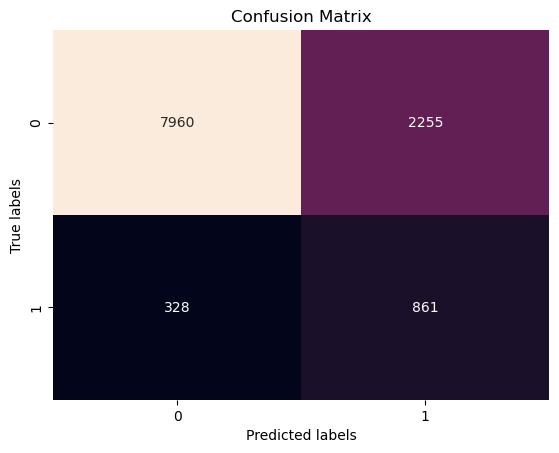

Registered model 'xgboost_model' already exists. Creating a new version of this model...
2023/01/23 18:39:03 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost_model, version 4
Created version '4' of model 'xgboost_model'.


In [51]:
params_forest = {'criterion': 'entropy',
 'max_features': 0.05,
 'min_samples_leaf': 4,
 'min_samples_split': 19,
 'n_estimators': 200,
 'random_state': 42
                }

evalset = [(df_resample_X, df_resample_y),(X_test,y_test)]

try:
    existing_exp = mlflow.get_experiment_by_name('Training_experiment')
    id_exp = existing_exp.experiment_id
except:
    id_exp = mlflow.create_experiment(name = "Training_experiment")
    
    
with mlflow.start_run(experiment_id=id_exp,run_name="RandomForestClassifier_best_param"):
        forest_class = RandomForestClassifier(**params_forest)
        forest_class.fit(df_resample_X, df_resample_y)

        predicted = forest_class.predict(X_test)

        acc,prec,rec,f1 = eval_metrics(y_test, predicted)

        print("  Accuracy: %s" % acc)
        print("  Precision: %s" % prec)
        print("  Recall: %s" % rec)
        print("  F1 score: %s" % f1)

        #mlflow.log_param("criterion", rfc.criterion)
        #mlflow.log_param("N estimator", rfc.get_params()["n_estimators"])
        mlflow.log_params(forest_class.get_params())
        mlflow.log_metric("Accuracy", acc)
        mlflow.log_metric("Precision", prec)
        mlflow.log_metric("Recall", rec)
        mlflow.log_metric("F1 score", f1)
        
        ax = plt.subplot()
        sns.heatmap(confusion_matrix(y_test,predicted),annot=True,cbar=False,fmt="g")
        plt.title("Confusion Matrix")
        ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
        plt.savefig("confusion_matrix.png")
        mlflow.log_artifact("confusion_matrix.png")
        plt.show()        
        

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":

            # Register the model
            # There are other ways to use the Model Registry, which depends on the use case,
            # please refer to the doc for more information:
            # https://mlflow.org/docs/latest/model-registry.html#api-workflow
            mlflow.sklearn.log_model(forest_class, "model_forest", registered_model_name="model")
        else:
            mlflow.sklearn.log_model(forest_class, "model_forest",registered_model_name="xgboost_model")
        mlflow.end_run()

In [47]:
forest_class.feature_importances_

array([0.02703831, 0.21798892, 0.66172401, 0.05521318, 0.03133884,
       0.00669674])

In [48]:
X_train.columns

Index(['bounces', 'time_on_site', 'pageviews', 'channelGrouping',
       'deviceCategory', 'country'],
      dtype='object')

In [163]:
def test_precision(y_true,y_predict,description, viz = True):
  """Function to calculate the recall and precision score for a classes"""
  if viz == True:
    sns.heatmap(confusion_matrix(y_true,y_predict),annot= True, cbar=False)
    plt.title(description)
    print('Precision score : '+ str(precision_score(y_true,y_predict)))
    print('Recall_score : '+str(recall_score(y_true,y_predict)))
    
  precision = precision_score(y_true,y_predict)
  recall = recall_score(y_true,y_predict)
  
  return precision, recall 

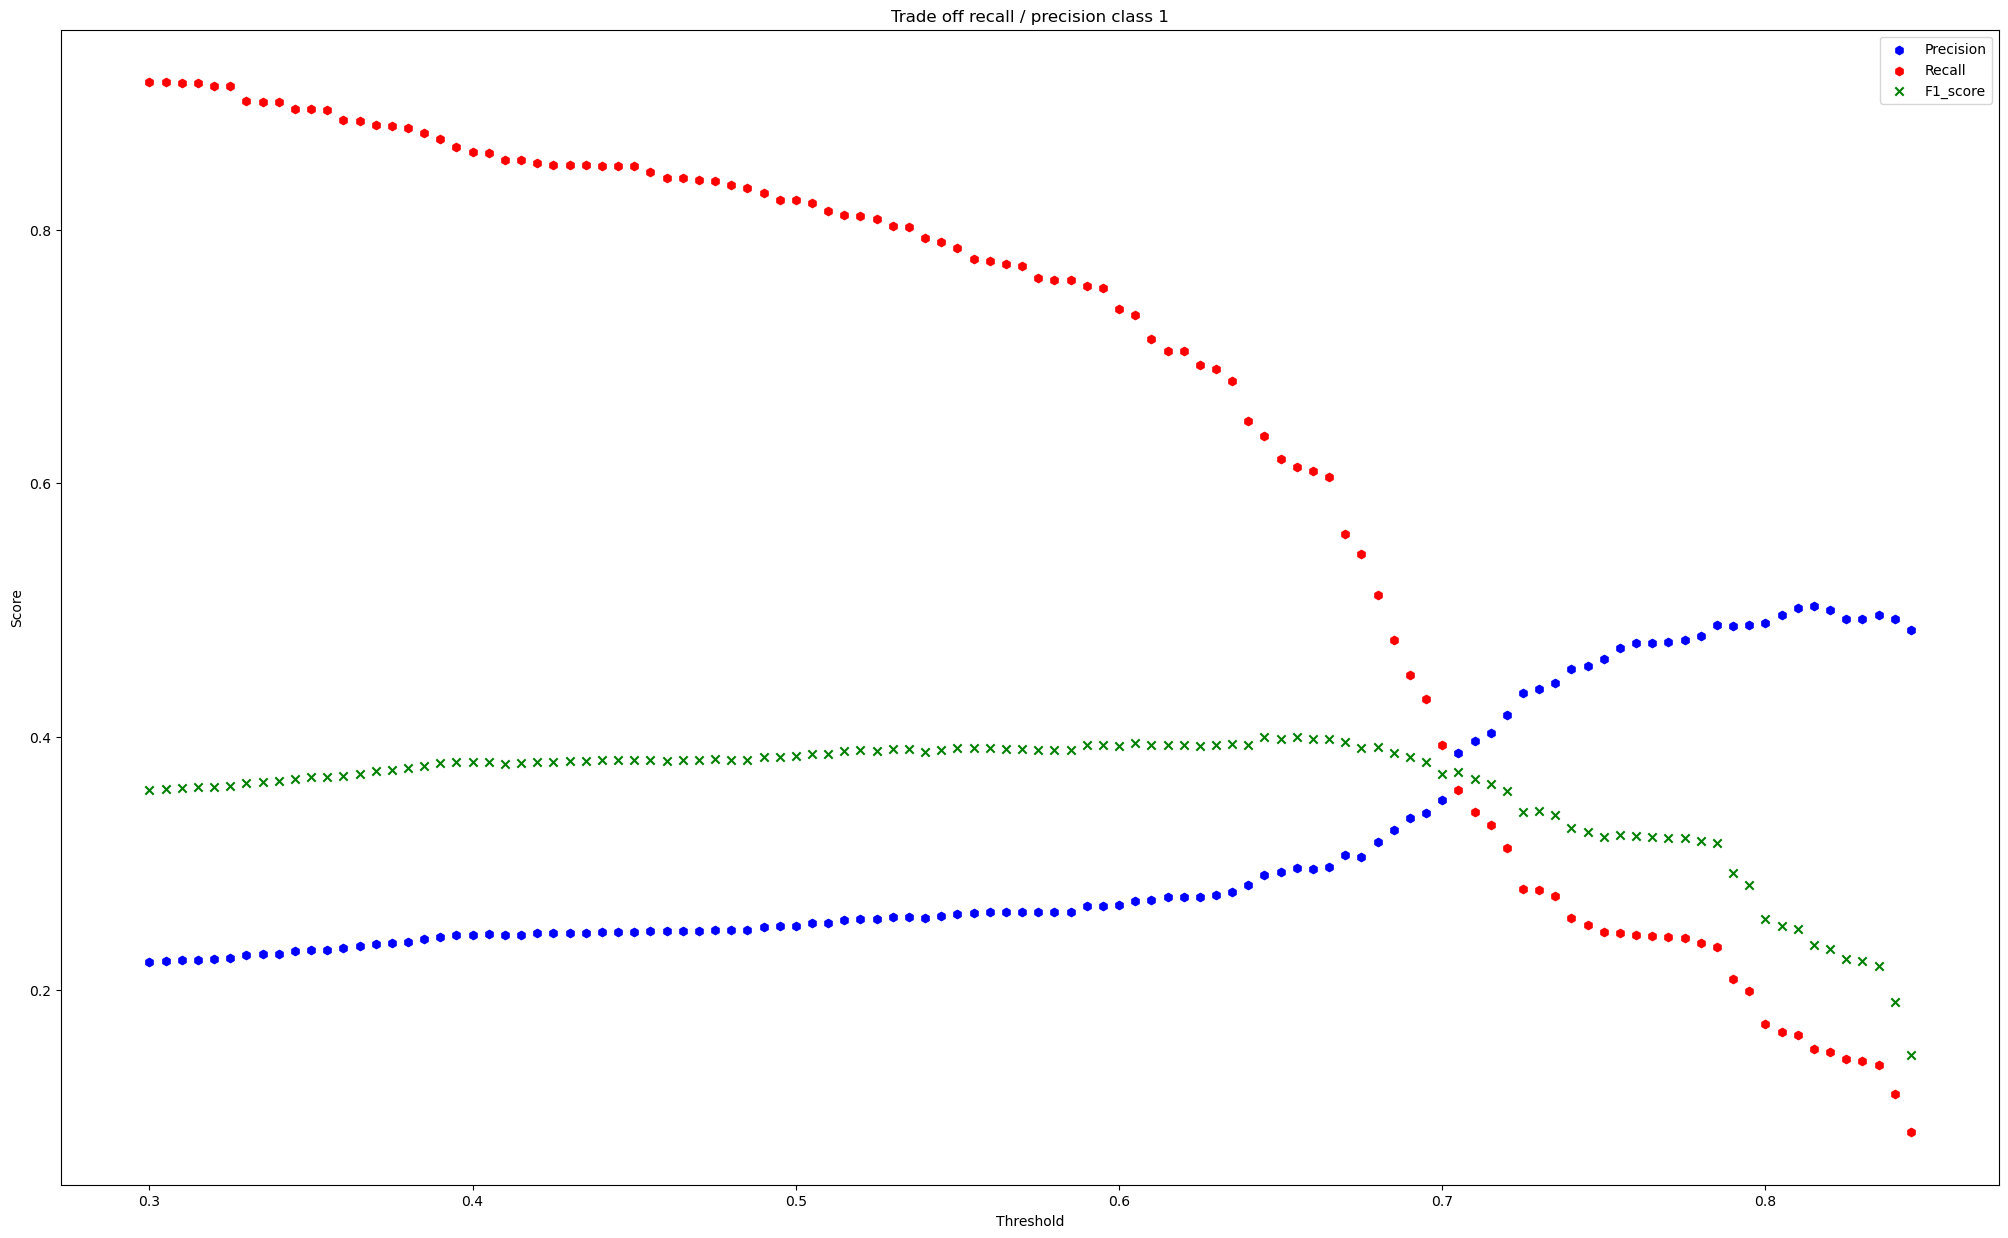

In [192]:
# #Just one time
X_test_df = X_test.copy()
X_test_df["proba_1"] = xgb.predict_proba(X_test)[:,1]
X_test_df["true"] = y_test

thresholding_list = np.arange(0.30,0.85,0.005)
threshold_df = []

pre_1 = []
recall_1 = []
F1_score = []

try: 
    
    existing_exp = mlflow.get_experiment_by_name('Threshold_moving')
    id_exp_threshold = existing_exp.experiment_id
except:
    id_exp_threshold = mlflow.create_experiment('Threshold_moving')

for i in thresholding_list :
    
    with mlflow.start_run(experiment_id=id_exp_threshold,run_name=f"Thresholding_testing_XGBOOST_{str(round(i,3))}"):
        threshold_df.append(i)
        predicted_value= X_test_df["proba_1"].apply(lambda x : 1 if x >= i else 0)
        actual_value = X_test_df["true"]
        precision,recall = test_precision(actual_value,predicted_value,"Threshold = "+str(i),False)
        F1_ = f1_score(actual_value,predicted_value)
        acc = accuracy_score(actual_value,predicted_value)
        mlflow.log_metric("Accuracy", acc)
        mlflow.log_metric("Precision", precision)
        mlflow.log_metric("Recall", recall)
        mlflow.log_metric("F1 score", F1_)
        mlflow.log_metric('Threshold',round(i,3))
        pre_1.append(precision)
        recall_1.append(recall)
        F1_score.append(F1_)
        dico_df = {"Threshold":threshold_df,
              "Recall":recall_1,
              "Precision":pre_1,
              "F1_score": F1_score}
        RF_preci_recall= pd.DataFrame(dico_df)
        mlflow.end_run()
                          
with mlflow.start_run(experiment_id=id_exp_threshold,run_name="General_experiment_review_Threshold_moving"):
    plt.figure(figsize = (25,15))
    plt.scatter(RF_preci_recall.Threshold, RF_preci_recall['Precision'], marker='h', color='blue', label='Precision')
    plt.scatter(RF_preci_recall.Threshold, RF_preci_recall['Recall'], marker='h', color='red', label='Recall')
    plt.scatter(RF_preci_recall.Threshold, RF_preci_recall['F1_score'], marker='x', color='green', label='F1_score')
    plt.legend()
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title("Trade off recall / precision class 1") 
    plt.savefig("Threshold_moving.png")
    mlflow.log_artifact("Threshold_moving.png")
    plt.show()
    Best_F1 = RF_preci_recall['F1_score'].max()
    Best_Recall = RF_preci_recall['Recall'].max()
    Best_Precision = RF_preci_recall['Precision'].max()
    mlflow.log_metric("Best Precision", Best_Precision)
    mlflow.log_metric("Best Recall", Best_Recall)
    mlflow.log_metric("Best F1 score", Best_F1)
                          
    RF_preci_recall.to_csv("Precision_recall_trade_off.csv",header=True)
    mlflow.log_artifact('Precision_recall_trade_off.csv')
    
    mlflow.end_run()

In [190]:
RF_preci_recall.sort_values('F1_score',ascending=False)

,Threshold,Recall,Precision,F1_score
49,0.645,0.637124,0.290951,0.399476
51,0.655,0.612876,0.296162,0.399346
52,0.660,0.609532,0.295860,0.398361
53,0.665,0.604515,0.296920,0.398237
50,0.650,0.618729,0.293534,0.398171
...,...,...,...,...
85,0.825,0.145485,0.492918,0.224661
86,0.830,0.143813,0.492837,0.222654
87,0.835,0.140468,0.495575,0.218893
88,0.840,0.117893,0.493007,0.190283


Text(0.5, 1.0, 'Trade off recall / precision class 1')

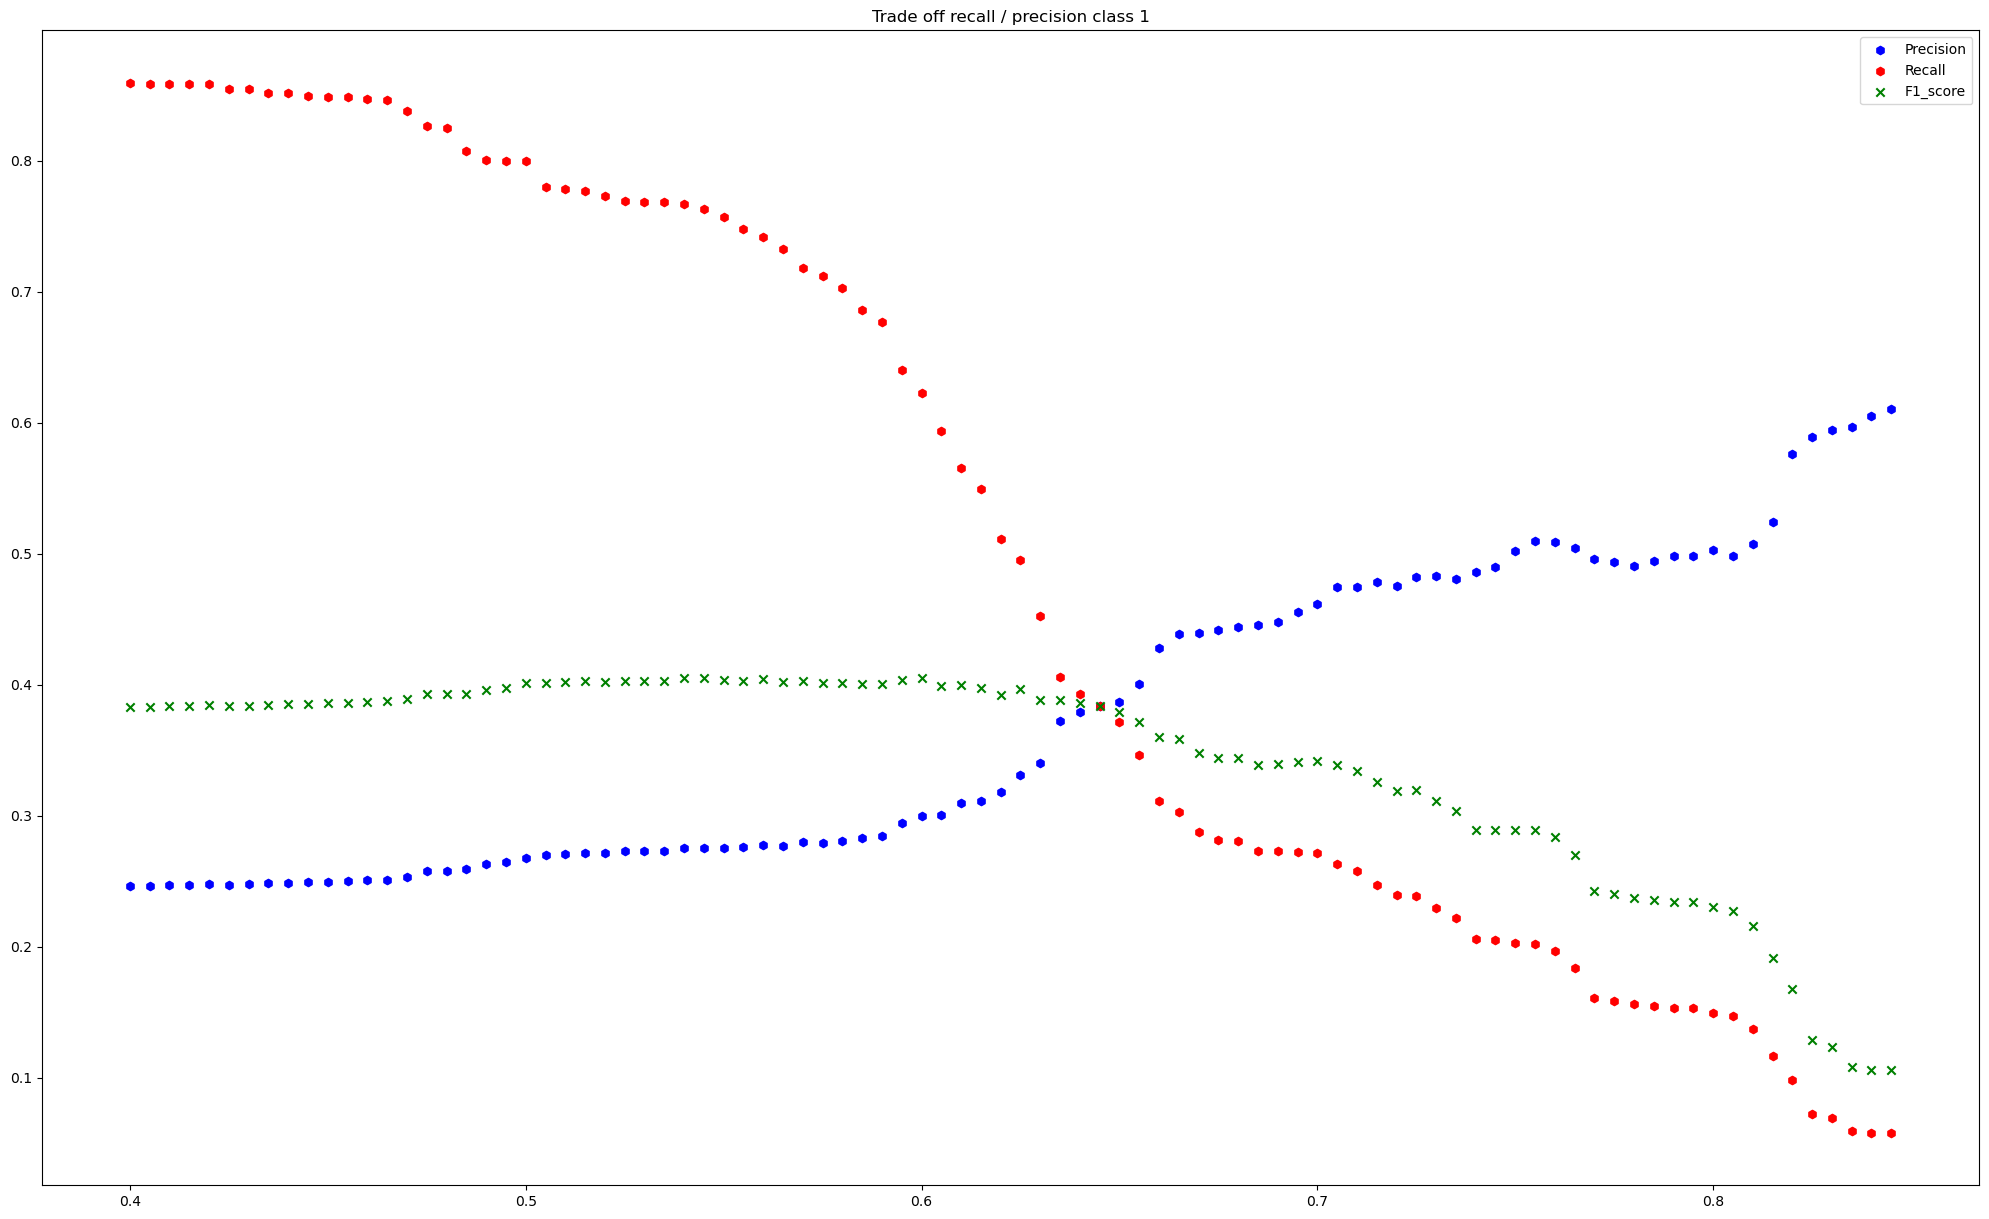

In [402]:
plt.figure(figsize = (25,15))
plt.scatter(RF_preci_recall.Threshold, RF_preci_recall['Precision'], marker='h', color='blue', label='Precision')
plt.scatter(RF_preci_recall.Threshold, RF_preci_recall['Recall'], marker='h', color='red', label='Recall')
plt.scatter(RF_preci_recall.Threshold, RF_preci_recall['F1_score'], marker='x', color='green', label='F1_score')
plt.legend()
plt.title("Trade off recall / precision class 1")

Dans le cadre des dataset déséquilibré la méthode du t m a pu amélioré des résultats. Dans notre cas, il ne semble pas avoir un impact décisif. Je perds trop de **Recall** par rapport au gain du **f1_score** et de **Precision**.  
Nous cherchons à augmenter la Precision mais sans trop pénaliser le Recall.  
Le point de croisement optimal semble être **0.6 de theshold** qui augmente légèrement la Precision sans pour autant totalement baisser le Recall.  

## Feature Importance

In [396]:
xgb.feature_importances_

array([0.02567015, 0.05462267, 0.69124687, 0.08899647, 0.08343233,
       0.05603142], dtype=float32)

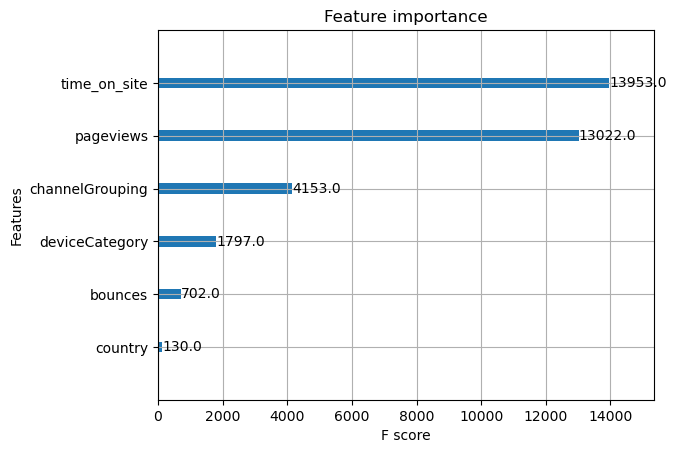

In [399]:
plot_importance(loaded_model)
plt.show()

Vue le peu d'importance que possède country, il faudra finalement drop la colonne et réentraîner le modèle sans celle-ci.

## Save model

In [ ]:
# import pickle

# with open("model.pkl", "wb") as file:
#     pickle.dump(model, file)